# **Exercise 1.2**

**a)** Podemos asignarle a algunas palabras un valor mayor, lo cual a su vez implica una mayor probabilidad de ser escogides. Algunas posibilidades son:

*   Se ha realizado una transacción en su cuenta.
*   Urgente
*   Alerta
*   Paquete entregado.



**b)** Las palabras con pesos pequeños, corresponderían a mensajes que no son de tipo SPAM, por ejemplo:

*  Institución
*  Proyecto"
*  Universidad"


**c)** El número de mensajes que se clasifican como SPAM dependen directamente del sesgo. Este sesgo nos delimita el límite para la salida del perceptron. Si el bias toma un valor negativo muy pequeño, obtendremos un mayor número de mensajes clasificados como SPAM. Y de manera análoga, si se define como un valor positivo grande, tendremos que el grueso de los mensajes no serán clasificadoc como SPAM. 





# **Exercise 1.3**

**a)**

Observando la actualización de pesos para  $x(t)$, tenemos.

La regla de actualización de pesos se expresa como:

$$w(t+1) = w(t) + y(t) * x(t)$$

Supongamos que $x(t)$ está clasificado incorrectamente por $w(t)$, así
$(t) * w(t) * x(t) ≤ 0$

de donde $y(t)$ es incorrecta.

Ahora, el vector de pesos $w(t+1)$ y su producto escalar con $x(t)$, satisfacen

\begin{equation}
\begin{split}
w(t+1) * x(t) &= (w(t) + y(t) * x(t)) * x(t)\\
&= w(t) * x(t) + y(t) * x(t) * x(t)\end{split}\end{equation}

Como $x(t)^2$ siempre es positivo, tenemos:
$$w(t+1) * x(t) = w(t) * x(t) + y(t) * ||x(t)||^2$$

Si nos enfocamos en el término $y(t) * ||x(t)||^2$, observamos un factor de escala positivo para $x(t)$ basado en su norma al cuadrado. Este término afecta directamente la dirección de la actualización de pesos.



Por lo tanto, la regla de actualización de pesos en la Ecuación, efectivamente se mueve en la dirección de clasificar correctamente $x(t)$, cuando $x(t)$ está clasificado incorrectamente por $w(t)$, como se muestra arriba.

**b)**

\begin{align*}
y(t)w^T(t+1)x(t) &= y(t) \left(w(t)+y(t)x(t)\right)^Tx(t) \\
&= y(t)\left(w^T(t) + y(t)x^T(t)\right)x(t) \\
&= y(t)w^T(t)x(t) + y(t)y(t)x^T(t)x(t)\\
&\gt y(t)w^T(t)x(t) \;\;\;\\
\end{align*}

**c)** del anterior punto podemos ver que  $y(t)w^T(t)x(t)$ es creciente en cada actualización

Entonces si nos movemos desde $w(t)$ hacia $w(t+1)$, es un movimiento entendido "en la dirección correcta" mientras pongamos foco en la clasificación de $x(t)$

# **Exercise 1.10**

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

In [3]:
# Simulación
flips = np.random.binomial(1, 0.5, (1000, 10))

coin1 = flips[0]
coin2 = flips[np.random.choice(1000)]
coin3 = flips[np.argmin(np.sum(flips, axis=1))]


f1 = np.mean(coin1)
f2 = np.mean(coin2)
f3 = np.mean(coin3)

print("Fracción de caras para cada moneda:")
print("Coin 1:", f1)
print("Coin 2:", f2)
print("Coin 3:", f3)

Fracción de caras para cada moneda:
Coin 1: 0.5
Coin 2: 0.6
Coin 3: 0.0


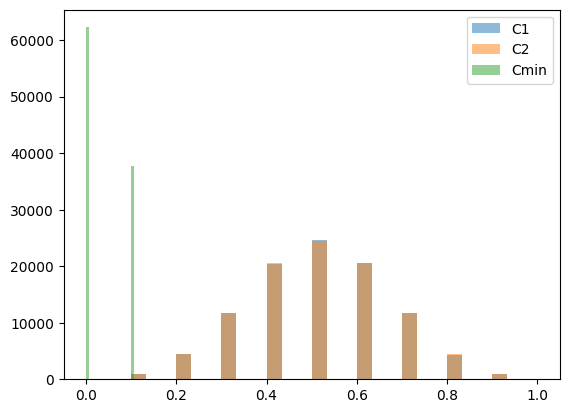

In [4]:
import matplotlib.pyplot as plt

# Repetir el experimento 100000 veces
n_trials = 100000 #se define la variable n_trials con el número de veces que se va a repetir el experimento.
results = np.zeros((n_trials, 3)) #Se crea un array de numpy llamado results que tendrá n_trials filas y 3 columnas. Esta matriz se usará para almacenar los resultados de cada repetición del experimento.
for i in range(n_trials):#e inicia un bucle for que se ejecutará n_trials veces.

    flips = np.random.binomial(1, 0.5, (1000, 10))#se generan aleatoriamente 1000 series de 10 lanzamientos de monedas
    coin1 = flips[0] #e define la variable coin1 como la primera serie de lanzamientos.
    coin2 = flips[np.random.choice(1000)] #se elige aleatoriamente una serie de lanzamientos de moneda y se define como coin2.
    coin3 = flips[np.argmin(np.sum(flips, axis=1))] #se busca la serie de lanzamientos de moneda con la menor cantidad de caras y se define como coin3.
    results[i] = [np.mean(coin1), np.mean(coin2), np.mean(coin3)] #se calcula la fracción de caras para cada una de las tres series de lanzamientos y se almacenan en la i-ésima fila de la matriz results.

# Graficar los histogramas de las distribuciones
plt.hist(results[:, 0], bins=30, alpha=0.5, label='C1')
plt.hist(results[:, 1], bins=30, alpha=0.5, label='C2')
plt.hist(results[:, 2], bins=30, alpha=0.5, label='Cmin')
plt.legend(loc='upper right')
plt.show()

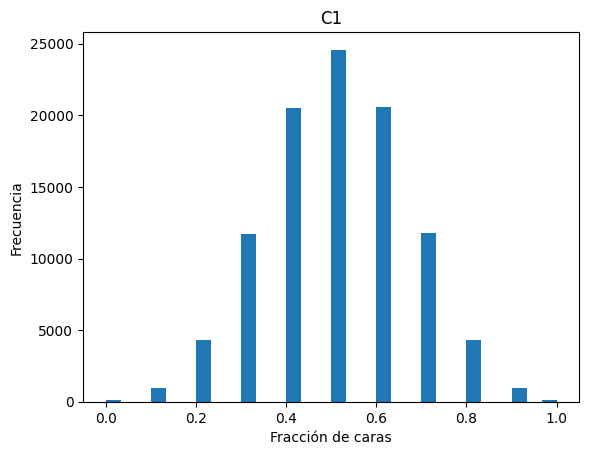

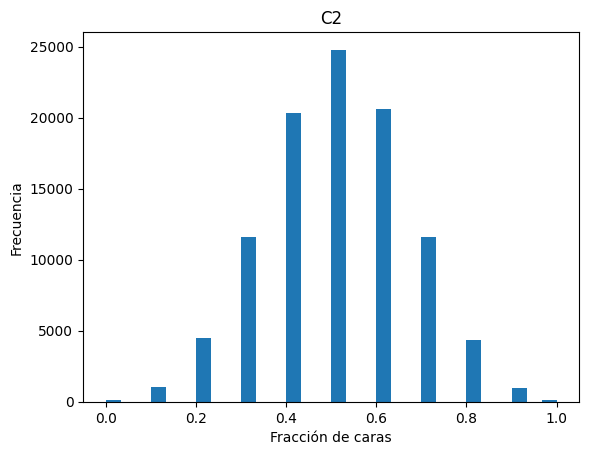

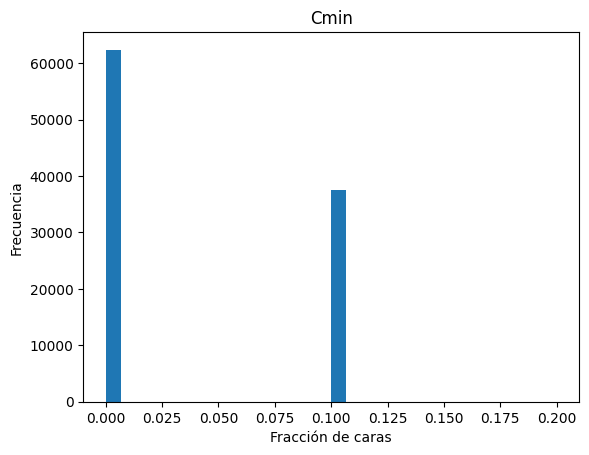

In [5]:
import matplotlib.pyplot as plt

# Repetir el experimento 100000 veces
n_trials = 100000
results = np.zeros((n_trials, 3))
for i in range(n_trials):
    flips = np.random.binomial(1, 0.5, (1000, 10))
    coin1 = flips[0]
    coin2 = flips[np.random.choice(1000)]
    coin3 = flips[np.argmin(np.sum(flips, axis=1))]
    results[i] = [np.mean(coin1), np.mean(coin2), np.mean(coin3)]

# Graficar el histograma de El
plt.hist(results[:, 0], bins=30)
plt.title('C1')
plt.xlabel('Fracción de caras')
plt.ylabel('Frecuencia')
plt.show()

# Graficar el histograma de Mrand
plt.hist(results[:, 1], bins=30)
plt.title('C2')
plt.xlabel('Fracción de caras')
plt.ylabel('Frecuencia')
plt.show()

# Graficar el histograma de Cmin
plt.hist(results[:, 2], bins=30)
plt.title('Cmin')
plt.xlabel('Fracción de caras')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

%matplotlib inline

#target = -1 + 2*x1 + 2*x2 #np.array([2,2,-1])
df = pd.DataFrame({'x1':[0,1,0,-0.5,-1,2,1,3,0.5,-1,0,-2,-3,1,2,-4,-3,3,-0.5,-2],
                   'x2':[0,1,1,0,-1,4,-1,-5,-2,1,3,0,-1,6,8,2,3,10,2,1], 
                   'y':[1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]})
df['x0'] = 1
df = df[['x0','x1', 'x2', 'y']]

def perceptron(points, dim, max_it=100, use_adaline=False, 
               eta = 1, randomize=False, print_out = True):
    w = np.zeros(dim+1)
    xs, ys = points[:,:dim+1], points[:,dim+1]
    num_points = points.shape[0]
    for it in range(max_it):
        correctly_predicted_ids=  set()
        idxs = np.arange(num_points)
        if randomize:
            idxs = np.random.choice(np.arange(num_points), num_points, replace=False)
        for idx in idxs:
            x, y = xs[idx], ys[idx]
            st = np.dot(w.T, x)
            prod = st*y #np.dot(w.T, x)*y
            if prod < -100: #avoid out of bound error
                st = -100
            threshold = 1 if use_adaline else 0
            st = st if use_adaline else 0
            if prod <= threshold:
                w = w + eta *(y-st)*x
                break #PLA picks one example at each iteration
            else:
                correctly_predicted_ids.add(idx)
        if len(correctly_predicted_ids) == num_points:
            break
    
    c = 0
    for x, y in zip(xs, ys):
        prod = np.dot(w.T, x)*y
        if prod > 0:
            c +=1
    w = w/w[-1]
    if print_out:
        print('final correctness: ', c, '. Total iteration: ', it)
        print('final normalized w:', w)
    return w, it
    
def flip_coins(total_coins):
    """Flip all coins once, return their head/tail status
    """
    
    hts = np.zeros(total_coins) #head: 1, tail: 0
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

def run_once(total_coins, total_flips, print_freq = False):
    v1, vrand, vmin = None, None, None
    crand = np.random.choice(total_coins)
    hts_sum = np.zeros(total_coins) # store the sum of heads in total_flips
    
    for flip in range(total_flips):
        hts_sum = hts_sum + flip_coins(total_coins)
    
    hts_freq = hts_sum/total_flips
    
    v1 = hts_freq[0]
    vrand = hts_freq[crand]
    cmin = np.argmin(hts_sum)
    vmin = hts_freq[cmin]
    
    if print_freq:
        print('Frequency of first coin: {}'.format(v1))
        print('Frequency of a random coin: id({})-freq({})'.format(crand, vrand))
        print('Frequency of the coin with minimum frequency: id({})-freq({})'.format(cmin, vmin))
    return v1,vrand,vmin

def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)


def generate_random_numbers01(N, dim, num_grid_points):
    random_ints = np.random.randint(num_grid_points, size=(N, dim))
    init_lb = 0
    return (random_ints - init_lb)/(num_grid_points - 1 - init_lb)

def generate_random_numbers(N, dim, num_grid_points, lb, ub):
    zero_to_one_points = generate_random_numbers01(N, dim, num_grid_points)
    res = lb + (ub - lb)*zero_to_one_points
    return res

def generate_random_coeffs(dim):
    rn = generate_random_numbers(1, dim, 1000, -10, 10)
    return rn

def true_f(x, coeffs):
    return coeffs.flatten()[0] + np.dot(coeffs.flatten()[1:], x.flatten())

def generate_two_classes(N, dim, true_func, rn_func):
    cls1, cls2 = [], []
    while True:
        rn = rn_func(1, dim).flatten()
        if true_func(rn) > 0 and len(cls1) < N:
            cls1.append(rn)
        elif true_func(rn) < 0 and len(cls2) < N:
            cls2.append(rn)
        if len(cls1) == N and len(cls2) == N:
            break
    return np.asarray(cls1), np.asarray(cls2)    

def generate_df(N, dim,true_func, rn_func):
    cls1, cls2 = generate_two_classes(N/2, dim, true_func, rn_func)
    cols = ['x' + str(i) for i in range(1, dim+1)]
    df1 = pd.DataFrame(cls1, columns=cols)
    df1['y'] = 1
    df2 = pd.DataFrame(cls2, columns=cols)
    df2['y'] = -1
    df = pd.concat([df1, df2])
    df['x0'] = 1
    df = df[['x0'] + cols + ['y']]
    return df

def plot_data(x1, df, norm_coeffs, norm_g, lb, ub):
        figsize = plt.figaspect(1)
        f, ax = plt.subplots(1, 1, figsize=figsize)
        cls1_df = df.loc[df['y']==1]
        cls2_df = df.loc[df['y']==-1]
        line = ax.plot(x1, -(norm_coeffs[0]+norm_coeffs[1]*x1), label='True Function')
        pluses = ax.scatter(cls1_df[['x1']].values, cls1_df[['x2']].values, marker='+', c= 'r', label='+1 labels')
        minuses = ax.scatter(cls2_df[['x1']].values, cls2_df[['x2']].values, marker=r'$-$', c= 'b', label='-1 labels')
        if norm_g is not None:
            hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'r', label='Final Hypothesis')

        ax.set_ylabel(r"$x_2$", fontsize=11)
        ax.set_xlabel(r"$x_1$", fontsize=11)
        ax.set_title('Data set size = %s'%N, fontsize=9)
        ax.axis('tight')
        legend_x = 2.0
        legend_y = 0.5
        ax.legend(['True Function', 'Final Hypothesis', 
                   '+1 labels', '-1 labels', ], 
                  loc='center right', bbox_to_anchor=(legend_x, legend_y))
        #ax.legend(handles=[pluses, minuses], fontsize=9)
        ax.set_ylim(bottom=lb, top=ub)
        plt.show()
        
def run_perceptron_experiment(N, dim, lb, ub, num_grid_points, coeff_lb, coeff_ub, 
                              eta, maxit, use_adaline=False, randomize=False,
                              show_plot=True, test_N = 10000):
    
    rns = generate_random_numbers(N, dim, num_grid_points, lb, ub)
    rn_func = partial(generate_random_numbers, num_grid_points = num_grid_points, lb = lb, ub = ub)
    coeffs = generate_random_numbers(1, dim+1, num_grid_points, coeff_lb, coeff_ub)
    norm_coeffs = coeffs.flatten()/coeffs.flatten()[-1]
    true_func = partial(true_f, coeffs = norm_coeffs)
    
    df = generate_df(N, dim, true_func, rn_func)
    test_df = generate_df(test_N, dim, true_func, rn_func)
    
    x1 = np.arange(lb, ub, 0.01)
    norm_g, num_its = perceptron(df.values, dim, maxit, use_adaline, 
                                 eta, randomize, show_plot)
    
    if show_plot:
        print('True coeffs: ', norm_coeffs)
        plot_data(x1, df, norm_coeffs, norm_g, lb, ub)
    return num_its, norm_g, test_df


# Exercise 1.10 (c)
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

%matplotlib inline

#target = -1 + 2*x1 + 2*x2 #np.array([2,2,-1])
df = pd.DataFrame({'x1':[0,1,0,-0.5,-1,2,1,3,0.5,-1,0,-2,-3,1,2,-4,-3,3,-0.5,-2],
                   'x2':[0,1,1,0,-1,4,-1,-5,-2,1,3,0,-1,6,8,2,3,10,2,1], 
                   'y':[1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]})
df['x0'] = 1
df = df[['x0','x1', 'x2', 'y']]

def perceptron(points, dim, max_it=100, use_adaline=False, 
               eta = 1, randomize=False, print_out = True):
    w = np.zeros(dim+1)
    xs, ys = points[:,:dim+1], points[:,dim+1]
    num_points = points.shape[0]
    for it in range(max_it):
        correctly_predicted_ids=  set()
        idxs = np.arange(num_points)
        if randomize:
            idxs = np.random.choice(np.arange(num_points), num_points, replace=False)
        for idx in idxs:
            x, y = xs[idx], ys[idx]
            st = np.dot(w.T, x)
            prod = st*y #np.dot(w.T, x)*y
            if prod < -100: #avoid out of bound error
                st = -100
            threshold = 1 if use_adaline else 0
            st = st if use_adaline else 0
            if prod <= threshold:
                w = w + eta *(y-st)*x
                break #PLA picks one example at each iteration
            else:
                correctly_predicted_ids.add(idx)
        if len(correctly_predicted_ids) == num_points:
            break
    
    c = 0
    for x, y in zip(xs, ys):
        prod = np.dot(w.T, x)*y
        if prod > 0:
            c +=1
    w = w/w[-1]
    if print_out:
        print('final correctness: ', c, '. Total iteration: ', it)
        print('final normalized w:', w)
    return w, it
    
def flip_coins(total_coins):
    """Flip all coins once, return their head/tail status
    """
    
    hts = np.zeros(total_coins) #head: 1, tail: 0
    probs = np.random.uniform(size=total_coins)
    hts[probs > 0.5] = 1
    return hts

def run_once(total_coins, total_flips, print_freq = False):
    v1, vrand, vmin = None, None, None
    crand = np.random.choice(total_coins)
    hts_sum = np.zeros(total_coins) # store the sum of heads in total_flips
    
    for flip in range(total_flips):
        hts_sum = hts_sum + flip_coins(total_coins)
    
    hts_freq = hts_sum/total_flips
    
    v1 = hts_freq[0]
    vrand = hts_freq[crand]
    cmin = np.argmin(hts_sum)
    vmin = hts_freq[cmin]
    
    if print_freq:
        print('Frequency of first coin: {}'.format(v1))
        print('Frequency of a random coin: id({})-freq({})'.format(crand, vrand))
        print('Frequency of the coin with minimum frequency: id({})-freq({})'.format(cmin, vmin))
    return v1,vrand,vmin

def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)


def generate_random_numbers01(N, dim, num_grid_points):
    random_ints = np.random.randint(num_grid_points, size=(N, dim))
    init_lb = 0
    return (random_ints - init_lb)/(num_grid_points - 1 - init_lb)

def generate_random_numbers(N, dim, num_grid_points, lb, ub):
    zero_to_one_points = generate_random_numbers01(N, dim, num_grid_points)
    res = lb + (ub - lb)*zero_to_one_points
    return res

def generate_random_coeffs(dim):
    rn = generate_random_numbers(1, dim, 1000, -10, 10)
    return rn

def true_f(x, coeffs):
    return coeffs.flatten()[0] + np.dot(coeffs.flatten()[1:], x.flatten())

def generate_two_classes(N, dim, true_func, rn_func):
    cls1, cls2 = [], []
    while True:
        rn = rn_func(1, dim).flatten()
        if true_func(rn) > 0 and len(cls1) < N:
            cls1.append(rn)
        elif true_func(rn) < 0 and len(cls2) < N:
            cls2.append(rn)
        if len(cls1) == N and len(cls2) == N:
            break
    return np.asarray(cls1), np.asarray(cls2)    

def generate_df(N, dim,true_func, rn_func):
    cls1, cls2 = generate_two_classes(N/2, dim, true_func, rn_func)
    cols = ['x' + str(i) for i in range(1, dim+1)]
    df1 = pd.DataFrame(cls1, columns=cols)
    df1['y'] = 1
    df2 = pd.DataFrame(cls2, columns=cols)
    df2['y'] = -1
    df = pd.concat([df1, df2])
    df['x0'] = 1
    df = df[['x0'] + cols + ['y']]
    return df

def plot_data(x1, df, norm_coeffs, norm_g, lb, ub):
        figsize = plt.figaspect(1)
        f, ax = plt.subplots(1, 1, figsize=figsize)
        cls1_df = df.loc[df['y']==1]
        cls2_df = df.loc[df['y']==-1]
        line = ax.plot(x1, -(norm_coeffs[0]+norm_coeffs[1]*x1), label='True Function')
        pluses = ax.scatter(cls1_df[['x1']].values, cls1_df[['x2']].values, marker='+', c= 'r', label='+1 labels')
        minuses = ax.scatter(cls2_df[['x1']].values, cls2_df[['x2']].values, marker=r'$-$', c= 'b', label='-1 labels')
        if norm_g is not None:
            hypothesis = ax.plot(x1, -(norm_g[0]+norm_g[1]*x1), c = 'r', label='Final Hypothesis')

        ax.set_ylabel(r"$x_2$", fontsize=11)
        ax.set_xlabel(r"$x_1$", fontsize=11)
        ax.set_title('Data set size = %s'%N, fontsize=9)
        ax.axis('tight')
        legend_x = 2.0
        legend_y = 0.5
        ax.legend(['True Function', 'Final Hypothesis', 
                   '+1 labels', '-1 labels', ], 
                  loc='center right', bbox_to_anchor=(legend_x, legend_y))
        #ax.legend(handles=[pluses, minuses], fontsize=9)
        ax.set_ylim(bottom=lb, top=ub)
        plt.show()
        
def run_perceptron_experiment(N, dim, lb, ub, num_grid_points, coeff_lb, coeff_ub, 
                              eta, maxit, use_adaline=False, randomize=False,
                              show_plot=True, test_N = 10000):
    
    rns = generate_random_numbers(N, dim, num_grid_points, lb, ub)
    rn_func = partial(generate_random_numbers, num_grid_points = num_grid_points, lb = lb, ub = ub)
    coeffs = generate_random_numbers(1, dim+1, num_grid_points, coeff_lb, coeff_ub)
    norm_coeffs = coeffs.flatten()/coeffs.flatten()[-1]
    true_func = partial(true_f, coeffs = norm_coeffs)
    
    df = generate_df(N, dim, true_func, rn_func)
    test_df = generate_df(test_N, dim, true_func, rn_func)
    
    x1 = np.arange(lb, ub, 0.01)
    norm_g, num_its = perceptron(df.values, dim, maxit, use_adaline, 
                                 eta, randomize, show_plot)
    
    if show_plot:
        print('True coeffs: ', norm_coeffs)
        plot_data(x1, df, norm_coeffs, norm_g, lb, ub)
    return num_its, norm_g, test_df


#**Exercise 1.11**

**a)** 
 El conjunto de hipótesis consta de dos hipótesis: $h1$, que es la función constante, y $h2$, que es la constante $-1$.

Recordemos que el algoritmo S selecciona la hipótesis más cercana a los datos, y en virtud de ello escoge la otra posibilidad.

Puntualmente, dado que $h2$ es la constante -1, siempre estará en desacuerdo con la función objetivo f en cualquier punto fuera de 'D' debido a que todos los ejemplos en 'D' tienen Yn = 1. Por lo tanto, S no puede producir una hipótesis que tenga un mejor rendimiento que el azar en cualquier punto fuera de 'D'.

Supongamos, para el resto del ejercicio, que todos los ejemplos en 'D' tienen Yn = 1.

El algoritmo C elige deliberadamente la hipótesis que está en desacuerdo con la función objetivo f en mayor medida. En este caso, la hipótesis elegida por C será h1, la función constante. Dado que todos los ejemplos en 'D' tienen Yn = 1, la hipótesis h1 clasificará incorrectamente todos los ejemplos.

Por lo tanto, en este escenario específico, la hipótesis producida por C no será mejor que la hipótesis producida por S, que es la constante -1.

**(c)**
En la visión probabilística, asumimos que hay una distribución de probabilidad en X, y se cumple $$P[f(x) = 1] = p$$. En este caso, p = 0.9, lo que significa que la probabilidad de que la función objetivo f(x) sea 1 es 0.9.

Para encontrar la probabilidad de que S produzca una hipótesis mejor que C, debemos considerar los casos en los que S elige h2 y C elige h1. Dado que h2 es la constante -1, funcionará mejor que h1 (que clasifica incorrectamente todos los ejemplos) si f(x) = -1.

La probabilidad de que S elija h2 se denota como $P[f(x) = -1]$ y es igual a $1 - P[f(x) = 1] = 1 - p = 1 - 0.9 = 0.1.$

Por lo tanto, la probabilidad de que S produzca una hipótesis mejor que C es 0.1.

**(d)** 

Para determinar si existe algún valor de p para el cual sea más probable que C produzca una hipótesis mejor que S, debemos comparar las probabilidades de que S elija h2 y C elija h1.

S elige h2 con una probabilidad de 1 - p, y C elige h1 con una probabilidad de p.

Para que C produzca una hipótesis mejor que S, necesitamos que la probabilidad de que C elija h1 sea mayor que la probabilidad de que S elija h2.

Matemáticamente, queremos que $$p > 1 - p$$.

Resolviendo esta desigualdad, obtenemos 2p > 1, lo que se simplifica a p > 0.5.

Por lo tanto, si la probabilidad p es mayor que 0.5, es más probable que C produzca una hipótesis mejor que S.

#Exercise 1.12

Respuestas

**a)** Garantizar que la g proporcionada aproxime bien fuera de la muestra es una afirmación fuerte. Sin embargo, sin ninguna información sobre la función objetivo f, no es posible hacer tal garantía. Por lo tanto, esta opción no es factible.

**b)** Prometer que con alta probabilidad la g producida aproximará bien fuera de la muestra es más realista. Mediante el uso de un algoritmo de aprendizaje, se puede aspirar a encontrar una hipótesis g que generalice bien a datos no vistos. Esta opción proporciona un nivel razonable de confianza en el rendimiento de g.

**c)** Esta opción reconoce la posibilidad de fracaso. Si se declara que existe fallo acasado, significa que no se pudo encontrar una hipótesis g que aproxime bien fuera de la muestra. Sin embargo, si se encuentra una hipótesis g, entonces con alta probabilidad, aproximará bien fuera de la muestra. Esta opción ofrece una red de seguridad mientras sigue ofreciendo una buena oportunidad de éxito.